# Movilidad Sustentable
## Ciencia de Datos & Inteligencia de Negocios

### Configuración

In [1]:
'''
Bicicletas: Recorridos
Clima: PRCP TAVG TEMP[C] HUM[%] PNM[hPa] DD[gr] FF[km/hr]                                                 
2020-2021
Data acquisition & wrangling
'''

import os
import sys
# import urllib.request

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
pyplot.rcParams['legend.loc'] = 'best'
pyplot.rcParams['figure.figsize'] = (20,5)
pyplot.rcParams['figure.dpi'] = 320
pyplot.style.use( 'ggplot' )


# import datetime
# from datetime import date, timedelta
# import re

datadir = 'datasets/'

In [ ]:
# pyplot.rcParams.keys()

In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount(
      '/content/drive/', 
    )
    if drive:
        datadir = '/content/drive/MyDrive/Academicos/UTN/BI/datasets/'
else:
    print('Not running on CoLab')

Not running on CoLab


In [2]:
datasets = {
  'recorridos' : {
    'df'     : pd.DataFrame(),
    'local'  : datadir + 'recorridos.zip',
  },
  'estaciones' : {
    'df'     : pd.DataFrame(),
    'local'  : datadir + 'estaciones.csv',
  }
}

In [3]:
'''
Cargar insumos
'''
def cargar_insumos( insumos ):
    for i in insumos:
        if 'zip' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_csv(
                insumos[i]['local'],
                compression = 'zip',
                encoding = 'utf-8', 
            )
        if 'csv' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_csv(
                insumos[i]['local'],
            )
        if 'xlsx' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_excel(
                insumos[i]['local'],
            )
        
        print( 'Cargado: ', insumos[i]['local'] )
    return insumos

In [4]:
insumos = cargar_insumos( datasets )

Cargado:  datasets/recorridos.zip
Cargado:  datasets/estaciones.csv


In [ ]:
# datasets['recorridos']['df'].isnull().sum()
# datasets['recorridos']['df'][ datasets['recorridos']['df']['DD'].isnull() ]['fecha'].unique()
# array(['2020-01-30', '2020-09-04', '2020-01-31', '2020-01-11',
#        '2020-10-21', '2020-02-13', '2020-10-14', '2020-09-19',
#        '2020-02-11', '2020-12-14', '2020-11-03', '2020-02-15',
#        '2020-10-19', '2020-09-02', '2021-02-14', '2021-01-28'],
#       dtype=object)

# datasets['recorridos']['df'][ datasets['recorridos']['df']['PRCP'].isnull() ]['fecha'].unique()
# array(['2021-02-12', '2021-02-11'], dtype=object)

In [5]:
# FILL NAN CON PROMEDIO o 0
for c in datasets['recorridos']['df'].columns:
    nulls = datasets['recorridos']['df'][c].isnull().sum()
    if nulls:
        mean = datasets['recorridos']['df'][c].mean()
        fill = mean
        types = datasets['recorridos']['df'][c].dtypes
        print( c, nulls, types, fill)
        datasets['recorridos']['df'][c].fillna( mean, inplace = True)
datasets['recorridos']['df'].isnull().sum()

DD 14350 float64 156.64104709819665
FF 14350 float64 14.931178295966397
HUM 14350 float64 64.6412668564204
PNM 14350 float64 1015.1488488165911
TEMP 14350 float64 20.561729029970913
PRCP 21005 float64 0.9043308412575622
TAVG 21005 float64 19.582630359747565


duracion            0
usuario_id          0
origen_id           0
origen_nombre       0
origen_fecha        0
origen_direccion    0
destino_id          0
destino_nombre      0
destino_fecha       0
fecha               0
ndia                0
wdia                0
dhabil              0
hora                0
mins                0
ddia                0
trimestre           0
feriado             0
duracion_mins       0
vuelta              0
distancia           0
velocidad_kmm       0
DD                  0
FF                  0
HUM                 0
PNM                 0
TEMP                0
PRCP                0
TAVG                0
dtype: int64

In [ ]:
datasets['recorridos']['df'].isnull().sum()

## Analisis Exploratorio de Datos (EDA)

## Time series analisis
- Diaria Delta
- Estacionalidad semanal
- Estacionalidad anual
- Estacionalidad diaria

### Estaciones mas usadas 
- Relación con anclajes
- Bicis ancladas x hora
- Distancias
- Matriz de cantidad de viajes entre cada una
- distancias a zonas de gran afluencia
- duracióones
- desviación de la duración promedio
- Circle graph
- Plazas en uso bicicletas en uso

### IDAS / Vueltas
- Distancias ida
- Duraciones de estaciones a vueltas mismo destino
- deviations del promedio
- nada con distancias

### Gruoup by recurrent users top 20
- Durations mean max
- cantidad de viajes
- duraciones 

## Exploratory Spatial Data Analysis (ESDA)

https://alcidanalytics.com/p/geographic-heatmap-in-python

https://alysivji.github.io/getting-started-with-folium.html

https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

In [ ]:
# datasets['recorridos']['df'] = datasets['recorridos']['df'].drop(columns = ['Unnamed: 0'])
datasets['recorridos']['df'].info()

In [13]:
datasets['recorridos']['df'].describe()

duracion    usuario_id     origen_id    destino_id          ndia  \
count  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06   
mean   1.360008e+03  4.366418e+05  1.526023e+02  1.537240e+02  1.727415e+02   
std    5.219582e+03  2.613882e+05  1.036271e+02  1.039965e+02  1.189105e+02   
min    0.000000e+00  3.700000e+01  1.000000e+00  1.000000e+00  1.000000e+00   
25%    6.830000e+02  1.747990e+05  7.000000e+01  7.100000e+01  5.800000e+01   
50%    1.095000e+03  4.971600e+05  1.420000e+02  1.420000e+02  1.510000e+02   
75%    1.613000e+03  6.840670e+05  2.270000e+02  2.270000e+02  2.870000e+02   
max    3.190094e+06  7.722650e+05  3.990000e+02  3.990000e+02  3.660000e+02   

               wdia        dhabil          hora          mins          ddia  \
count  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06   
mean   3.032122e+00  2.676250e-01  1.431416e+01  2.915972e+01  3.183070e+02   
std    1.916750e+00  4.427210e-01  5.293337e+00  1.726815e+01  1.274829e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.000000e+00  0.000000e+00  1.100000e+01  1.400000e+01  2.530000e+02   
50%    3.000000e+00  0.000000e+00  1.500000e+01  2.900000e+01  3.320000e+02   
75%    5.000000e+00  1.000000e+00  1.800000e+01  4.400000e+01  4.170000e+02   
max    6.000000e+00  1.000000e+00  2.300000e+01  5.900000e+01  5.180000e+02   

       ...  velocidad_kmm            DD            FF           HUM  \
count  ...   3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06   
mean   ...   1.229052e-01  1.566410e+02  1.493118e+01  6.464127e+01   
std    ...   6.643371e-02  1.338127e+02  7.319382e+00  2.118369e+01   
min    ...   0.000000e+00  0.000000e+00  0.000000e+00  1.700000e+01   
25%    ...   8.500000e-02  7.000000e+01  9.000000e+00  5.400000e+01   
50%    ...   1.325000e-01  1.100000e+02  1.300000e+01  6.700000e+01   
75%    ...   1.680000e-01  2.000000e+02  1.900000e+01  7.700000e+01   
max    ...   1.505000e+00  9.900000e+02  5.700000e+01  1.014000e+03   

                PNM          TEMP          PRCP          TAVG          TMAX  \
count  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06   
mean   1.015149e+03  2.056173e+01  6.710092e+00  1.958263e+01  2.454932e+01   
std    1.390818e+01  5.092304e+00  4.782014e+00  4.843546e+00  3.666587e+00   
min    5.000000e+01  3.200000e+00  0.000000e+00  7.600000e+00  1.160000e+01   
25%    1.011500e+03  1.670000e+01  6.710092e+00  1.600000e+01  2.430000e+01   
50%    1.015149e+03  2.110000e+01  6.710092e+00  2.040000e+01  2.454932e+01   
75%    1.019000e+03  2.430000e+01  6.710092e+00  2.340000e+01  2.460000e+01   
max    1.035600e+03  3.530000e+01  6.100000e+01  2.890000e+01  3.550000e+01   

               TMIN  
count  3.331632e+06  
mean   1.544082e+01  
std    4.852400e+00  
min    2.600000e+00  
25%    1.240000e+01  
50%    1.544082e+01  
75%    1.900000e+01  
max    2.630000e+01  

[8 rows x 25 columns]

In [ ]:
## Time series analisis

In [91]:
### Analisis Diario
diaria =  datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id','fecha',]
).agg(
  salidas = ( 'origen_id',  'count'),
  arribos = ( 'destino_id',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
  distancia = ( 'distancia',  'mean'),
)
diaria = diaria.pivot_table(
    index = [ 'origen_nombre', 'origen_id', ],
    columns = ['fecha'],
    values = ['salidas', 'duracion', 'distancia'],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
diaria.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 236 entries, ('FACULTAD DE DERECHO', 1) to ('GARCIA DEL RIO', 399)
Columns: 1407 entries, ('distancia', '2020-01-01') to ('salidas', '2021-06-02')
dtypes: float64(937), int64(470)
memory usage: 2.5+ MB


In [ ]:
# demanda_diaria['salidas'].mean().plot()
# # # first we'll do it the default way, with gaps on weekends
# # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
# # ax1.plot(r.date, r.adj_close, 'o-')
# # ax1.set_title( 'Default' )
# # fig.autofmt_xdate()
# https://news.knowledia.com/US/en/articles/rolling-aggregations-on-time-series-data-with-pandas-b96c64108be946dfa88931b59b9be6209b2b1901
# pyplot.show()

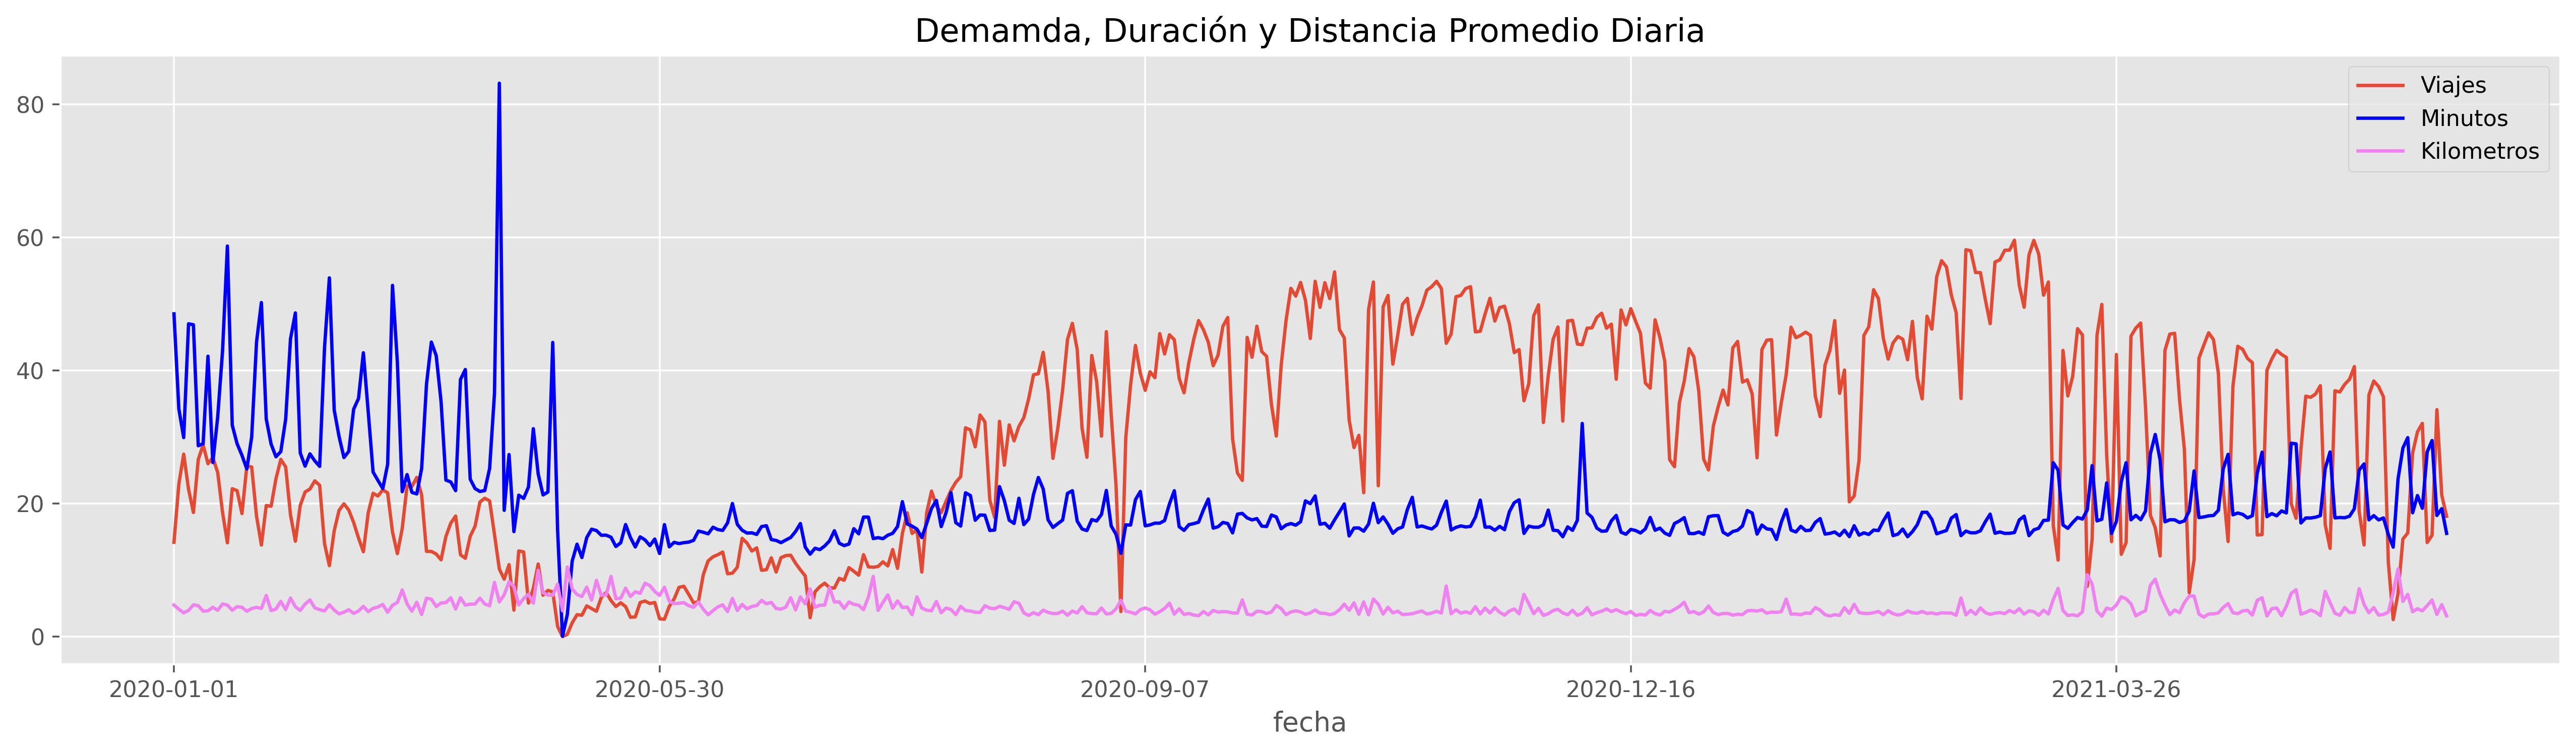

In [243]:
diaria['salidas'].mean().plot( label = 'Viajes' )
# demanda_diaria['arribos'].mean().plot( label = 'Arribos', color={ 'Arribos': 'yellow' } )
diaria['duracion'].mean().plot( label = 'Minutos', color={ 'Minutos': 'blue' } )
diaria['distancia'].max().plot( label = 'Kilometros', color={ 'Kilometros': 'violet' } )
pyplot.legend( loc = 'best' )
pyplot.title( 'Demamda, Duración y Distancia Promedio Diaria' )
pyplot.show()

In [59]:
## ESTACIONALIDAD SEMANAL

In [93]:
semana = datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id','wdia',]
).agg(
  salidas = ( 'wdia',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
  distancia = ( 'distancia',  'mean'),
)
semana = semana.pivot_table(
    index = [ 'origen_nombre', 'origen_id', ],
    columns = ['wdia'],
    values = ['salidas', 'duracion', 'distancia'],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')

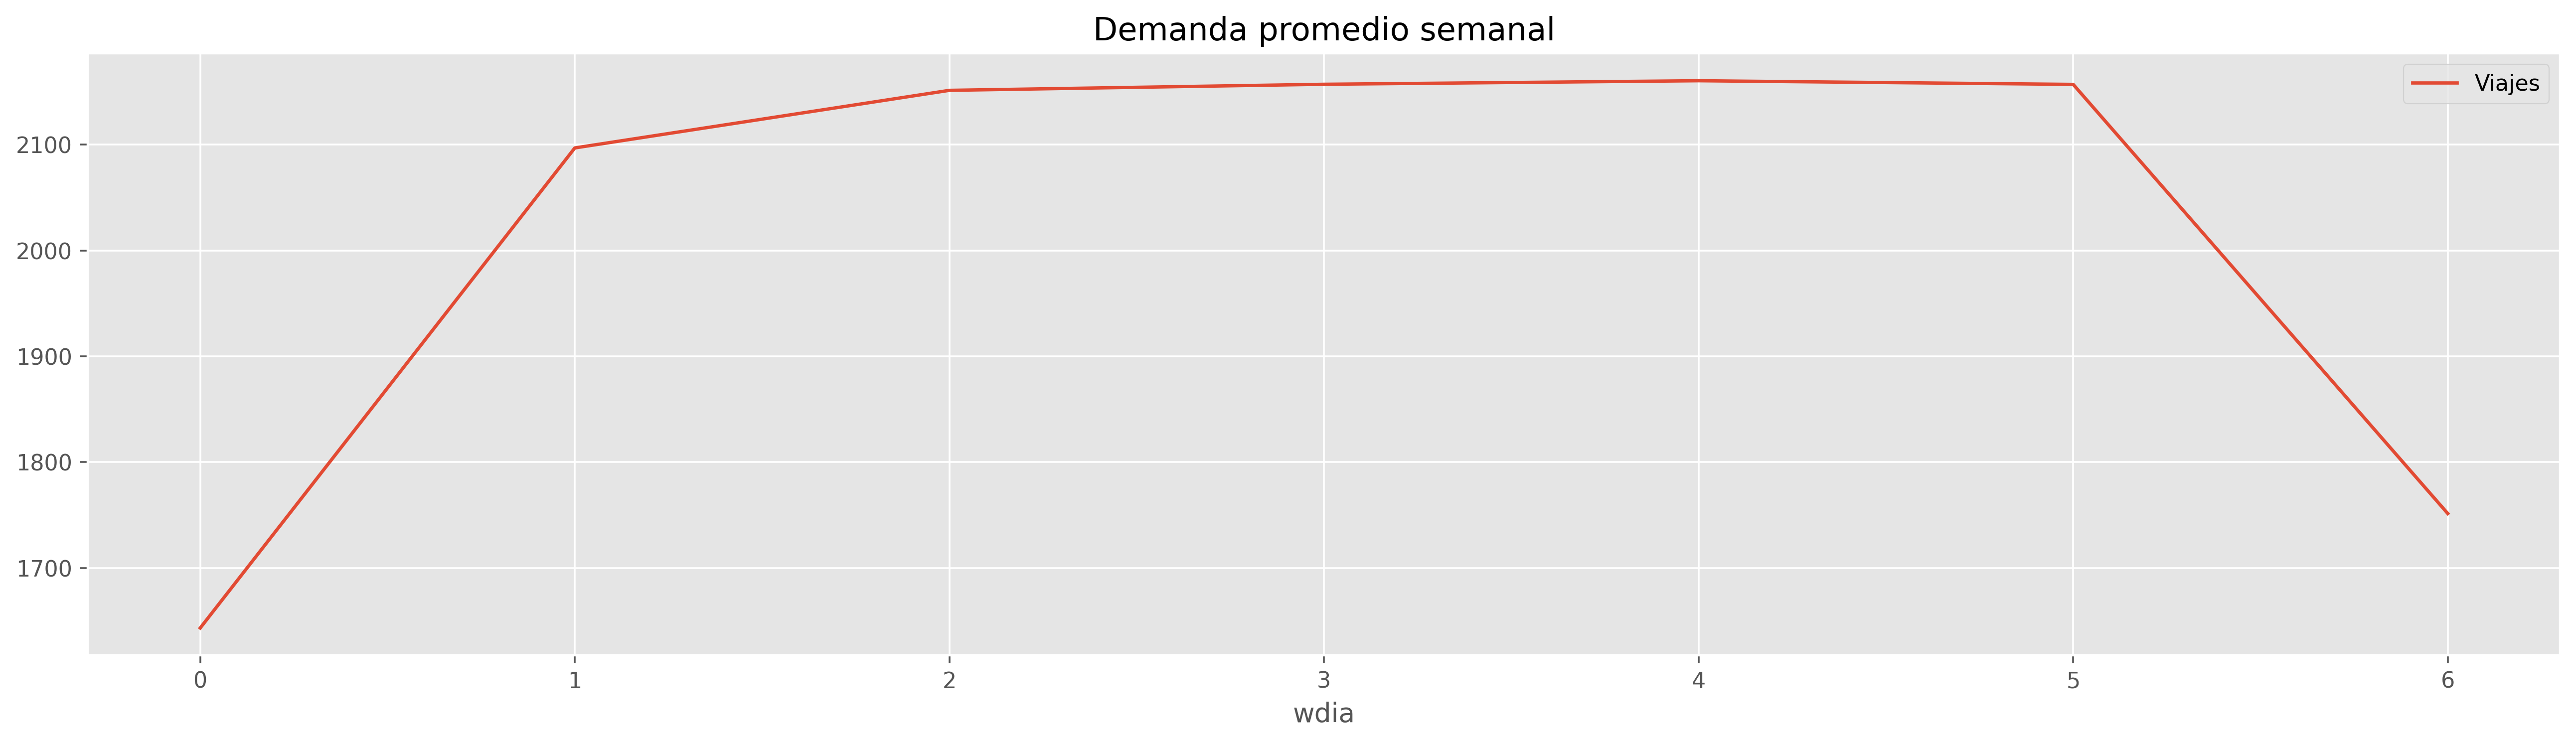

In [94]:
semana['salidas'].mean().plot( kind = 'line', label = 'Viajes')
pyplot.legend( loc = 'best' )
pyplot.title( 'Demanda promedio semanal' )
pyplot.show()

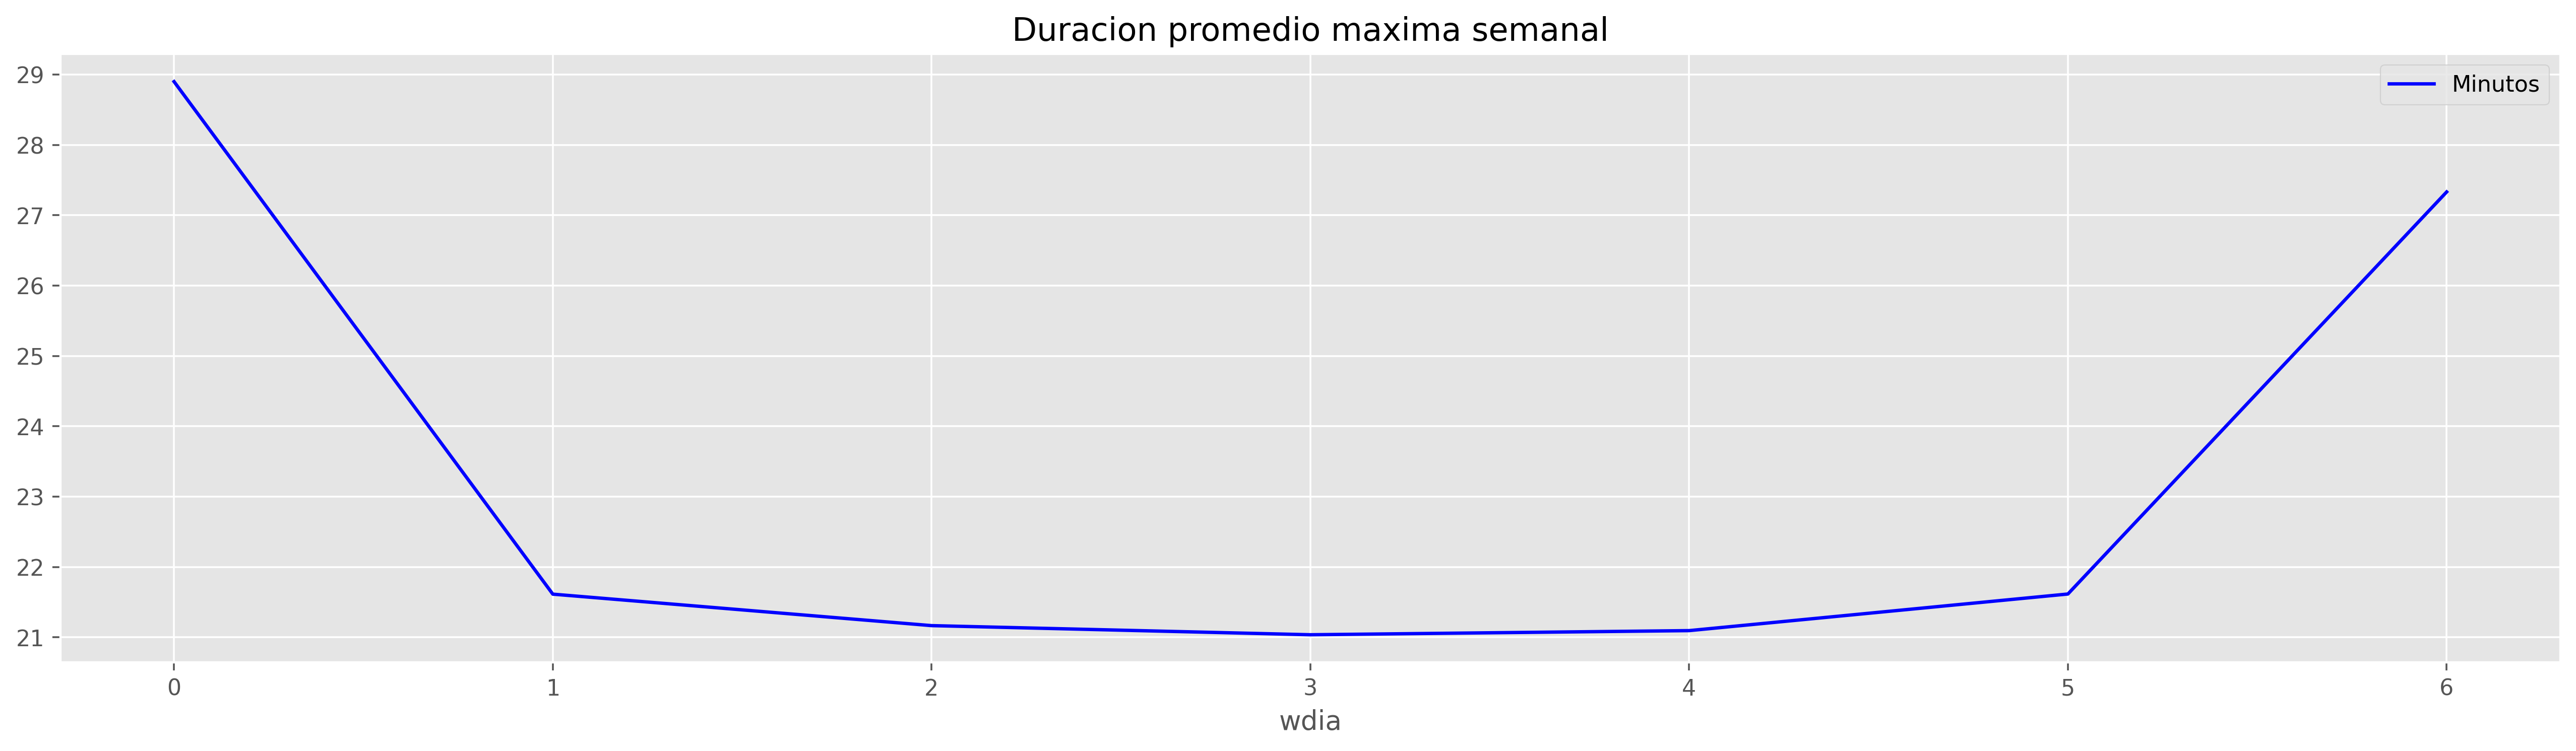

In [95]:
semana['duracion'].mean().plot( kind = 'line', label = 'Minutos', color={ 'Minutos': 'blue' })
pyplot.legend( loc = 'best' )
pyplot.title( 'Duracion promedio maxima semanal' )
pyplot.show()

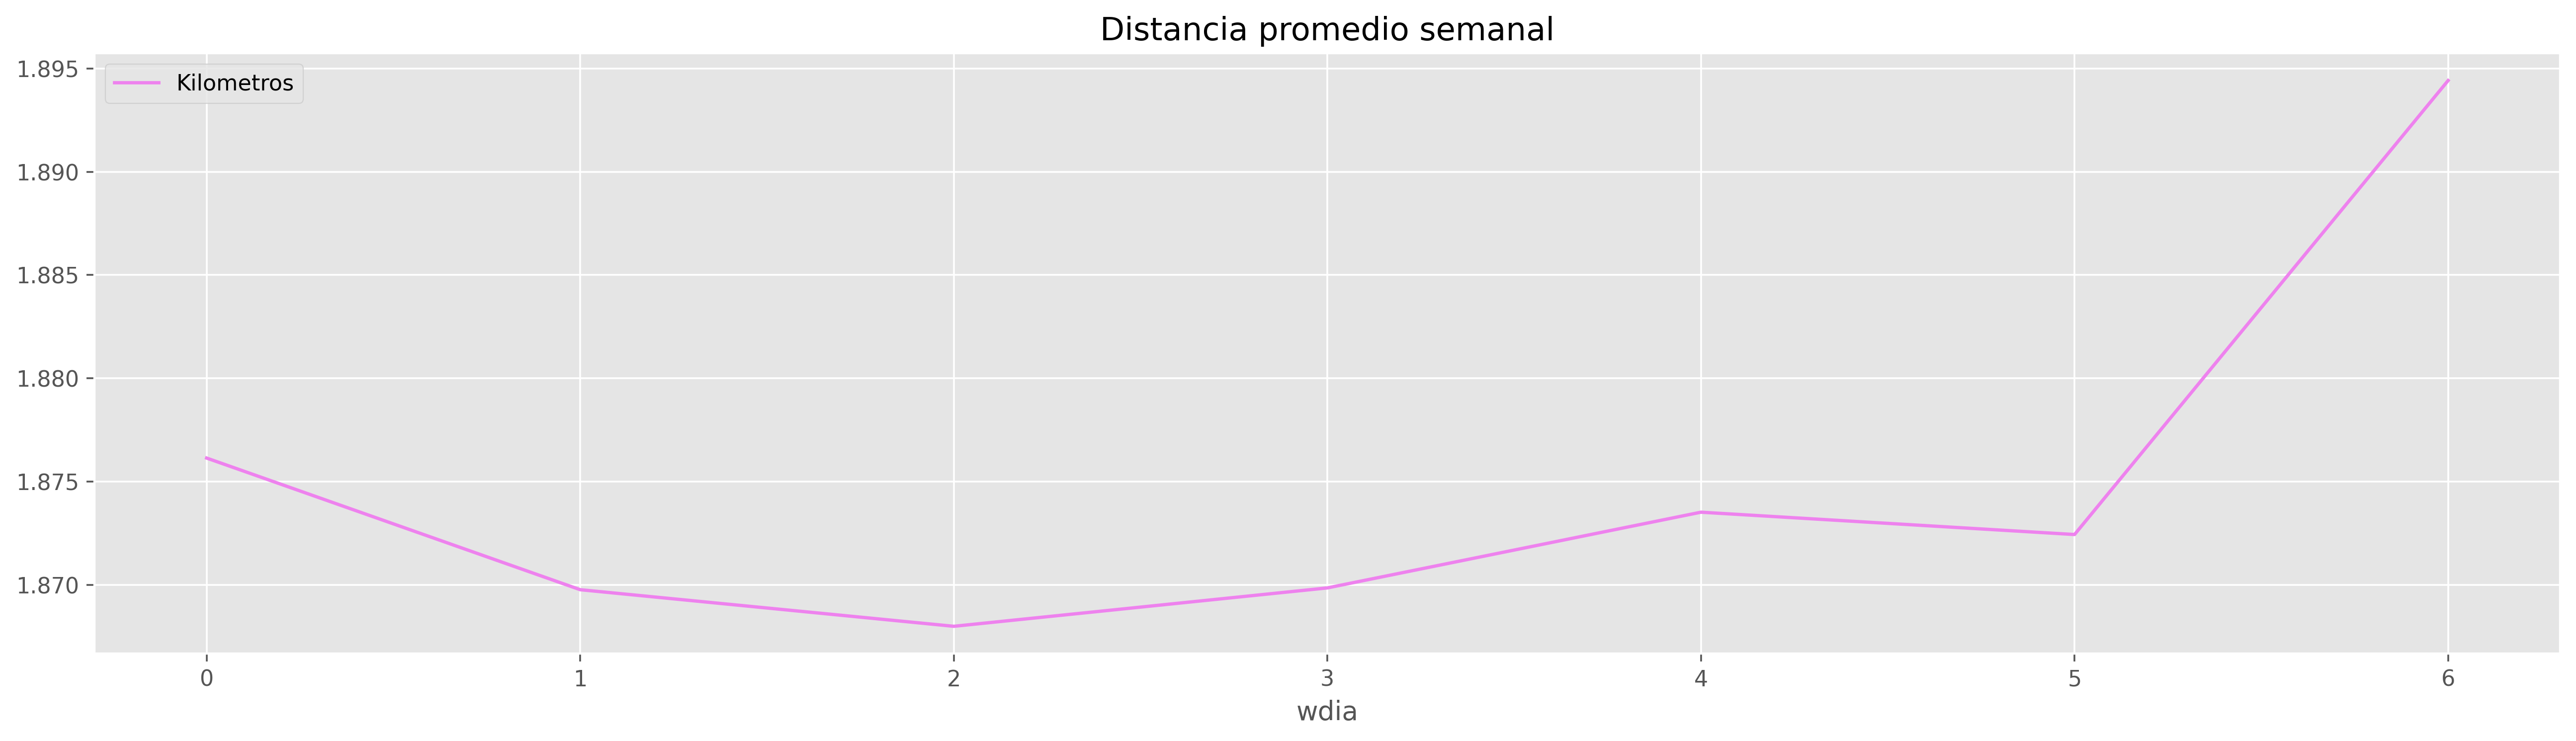

In [96]:
semana['distancia'].mean().plot( kind = 'line', label = 'Kilometros', color = { 'Kilometros': 'violet' })
pyplot.legend( loc = 'best' )
pyplot.title( 'Distancia promedio semanal' )
pyplot.show()

In [77]:
# SEASONING HORARIO

In [99]:
horario = datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id','hora',]
).agg(
  salidas = ( 'hora',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
  distancia = ( 'distancia',  'mean'),
)
horario = horario.pivot_table(
    index = [ 'origen_nombre',  'origen_id', ],
    columns = ['hora'],
    values = ['salidas', 'duracion', 'distancia'],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
horario

distancia                                \
hora                                 0         1         2         3    
origen_nombre       origen_id                                           
FACULTAD DE DERECHO 1          2.282759  2.488532  2.239324  2.555294   
RETIRO I            2          2.285417  2.314333  2.102500  3.463333   
ADUANA              3          3.474848  3.013452  2.325909  2.042500   
PLAZA ROMA          4          2.787722  2.978780  3.018276  2.707143   
PLAZA ITALIA        5          2.312183  2.313208  2.440074  2.285368   
...                                 ...       ...       ...       ...   
BARRIO 31           393        1.539355  1.284603  1.253333  1.552857   
AV. LA PLATA        394        0.000000  0.000000  0.000000  0.000000   
AGRONOMIA II        395        0.000000  0.000000  0.000000  0.000000   
PLAZA ALBERTI       396        1.975781  2.203344  2.372848  2.344725   
GARCIA DEL RIO      399        1.894101  2.231950  2.260913  2.343250   

                                                                       \
hora                                 4         5         6         7    
origen_nombre       origen_id                                           
FACULTAD DE DERECHO 1          3.134868  2.391722  1.737500  1.740100   
RETIRO I            2          1.368000  2.441017  2.755500  1.916588   
ADUANA              3          3.246400  0.779222  1.060049  1.080432   
PLAZA ROMA          4          3.488462  3.313134  1.328937  1.740000   
PLAZA ITALIA        5          2.161318  1.793175  1.809176  2.204907   
...                                 ...       ...       ...       ...   
BARRIO 31           393        4.142703  1.222296  1.454435  1.826381   
AV. LA PLATA        394        0.000000  0.000000  0.000000  0.000000   
AGRONOMIA II        395        0.000000  0.000000  0.000000  0.000000   
PLAZA ALBERTI       396        1.874000  1.736429  3.807400  2.681302   
GARCIA DEL RIO      399        2.553708  2.632525  2.285855  1.857071   

                                                   ... salidas              \
hora                                 8         9   ...      14    15    16   
origen_nombre       origen_id                      ...                       
FACULTAD DE DERECHO 1          1.988955  2.167533  ...    1697  2303  3026   
RETIRO I            2          1.846935  1.895023  ...     563   596   654   
ADUANA              3          1.447704  1.758070  ...     848   907   844   
PLAZA ROMA          4          1.350634  1.317344  ...     407   528   625   
PLAZA ITALIA        5          1.940025  2.004148  ...    1917  2299  2695   
...                                 ...       ...  ...     ...   ...   ...   
BARRIO 31           393        1.702854  1.684228  ...     342   449   515   
AV. LA PLATA        394        0.000000  0.000000  ...      37    65    77   
AGRONOMIA II        395        0.000000  0.000000  ...      28    59    74   
PLAZA ALBERTI       396        2.382000  2.186253  ...    1168  1435  1527   
GARCIA DEL RIO      399        1.717085  2.026374  ...    1361  1825  2234   

                                                                       
hora                             17    18    19    20    21   22   23  
origen_nombre       origen_id                                          
FACULTAD DE DERECHO 1          3491  3795  3724  2632  1564  802  519  
RETIRO I            2           780   843   397   322   271  153   82  
ADUANA              3           685   530   367   260   197  141  147  
PLAZA ROMA          4           703   511   350   201   131  125   93  
PLAZA ITALIA        5          3017  3124  2598  2226  1316  932  767  
...                             ...   ...   ...   ...   ...  ...  ...  
BARRIO 31           393         647   532   308   238   190  161  111  
AV. LA PLATA        394          95    71    43    40    19   11   13  
AGRONOMIA II        395          63    64    49    22    29   10    6  
PLAZA ALBERTI       396    

In [100]:
# HORA PICO
horario['salidas'].sum()[ 
    horario['salidas'].sum() == horario['salidas'].sum().max()
]

hora
18    281710
dtype: int64

In [101]:
# HORA MENOS USO PROMEDIO 
horario['salidas'].mean().astype(int)[
    horario['salidas'].mean() == horario['salidas'].mean().min()
]

hora
4    58
dtype: int64

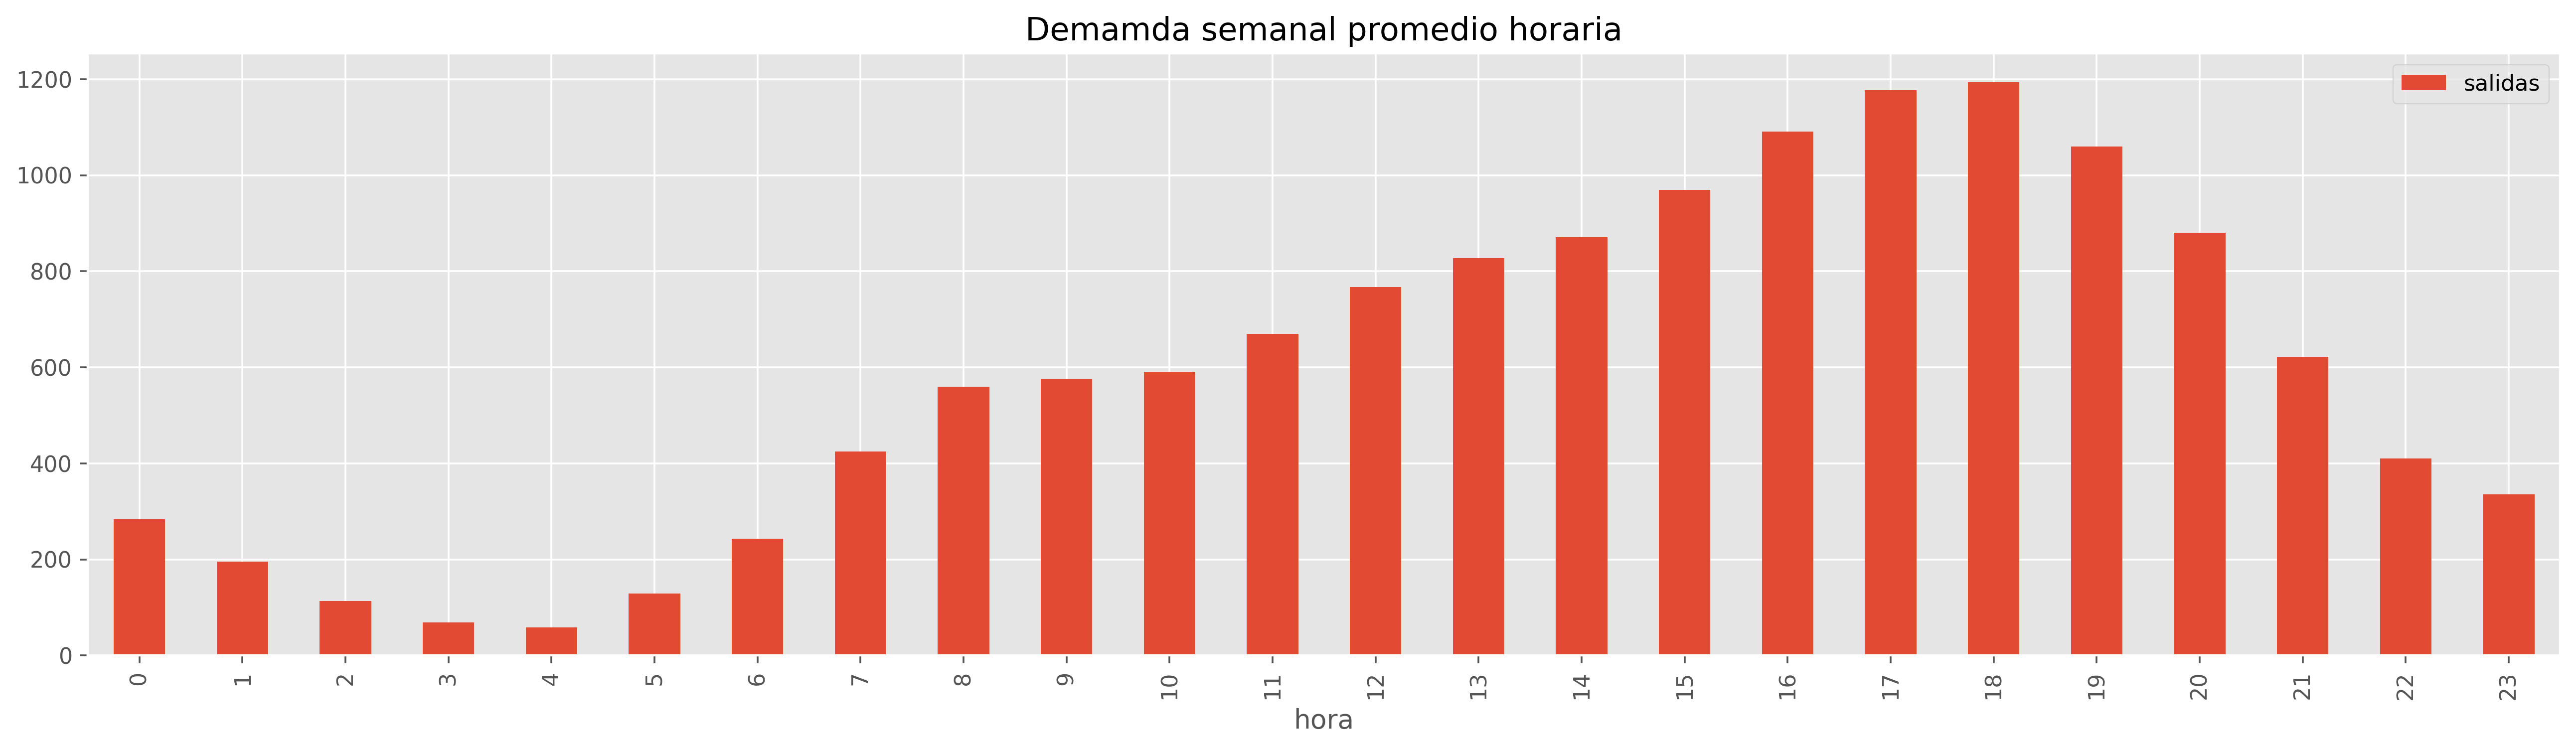

In [102]:
# figure(figsize=(20, 5), dpi=320)
horario['salidas'].mean().plot( kind = 'bar', label = 'salidas')
pyplot.legend( loc = 'best' )
pyplot.title( 'Demamda semanal promedio horaria' )
pyplot.show()

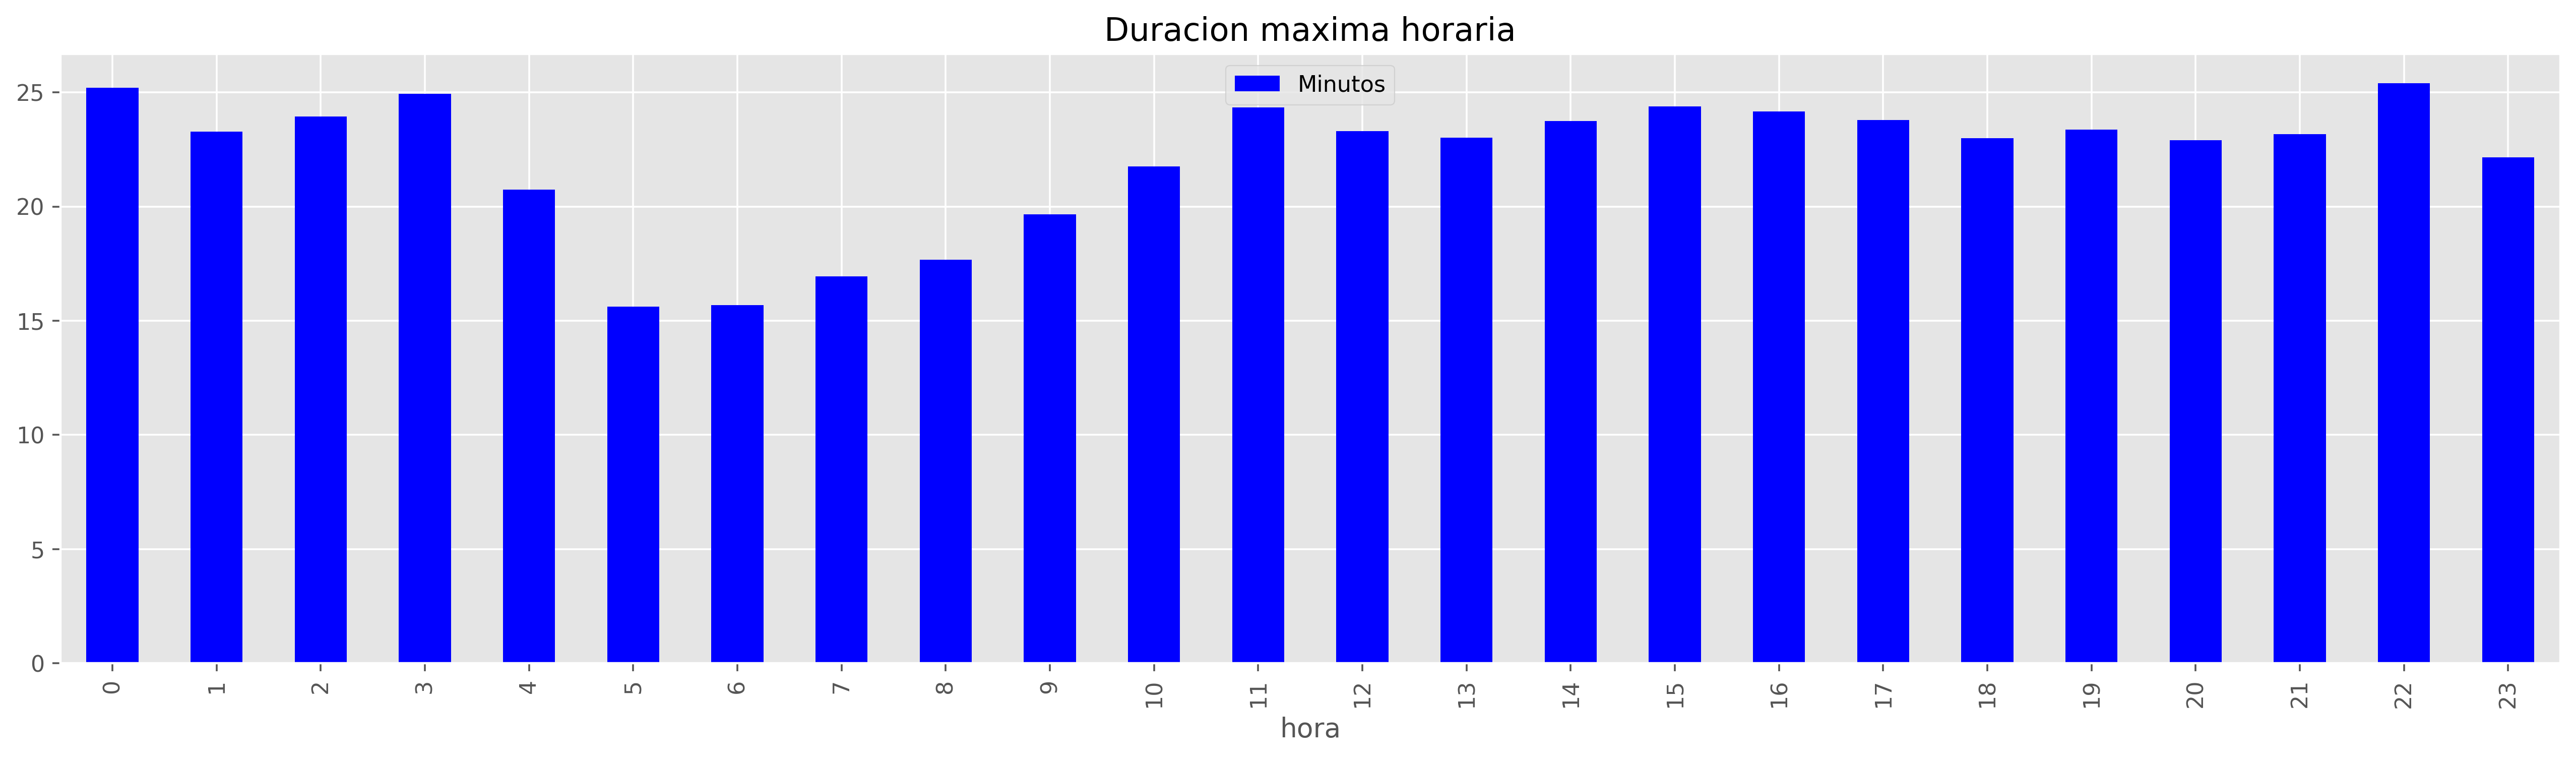

In [103]:
horario['duracion'].mean().plot( kind = 'bar',label = 'Minutos', color={'blue' })
pyplot.legend( loc = 'best' )
pyplot.title( 'Duracion promedio horaria' )
pyplot.show()

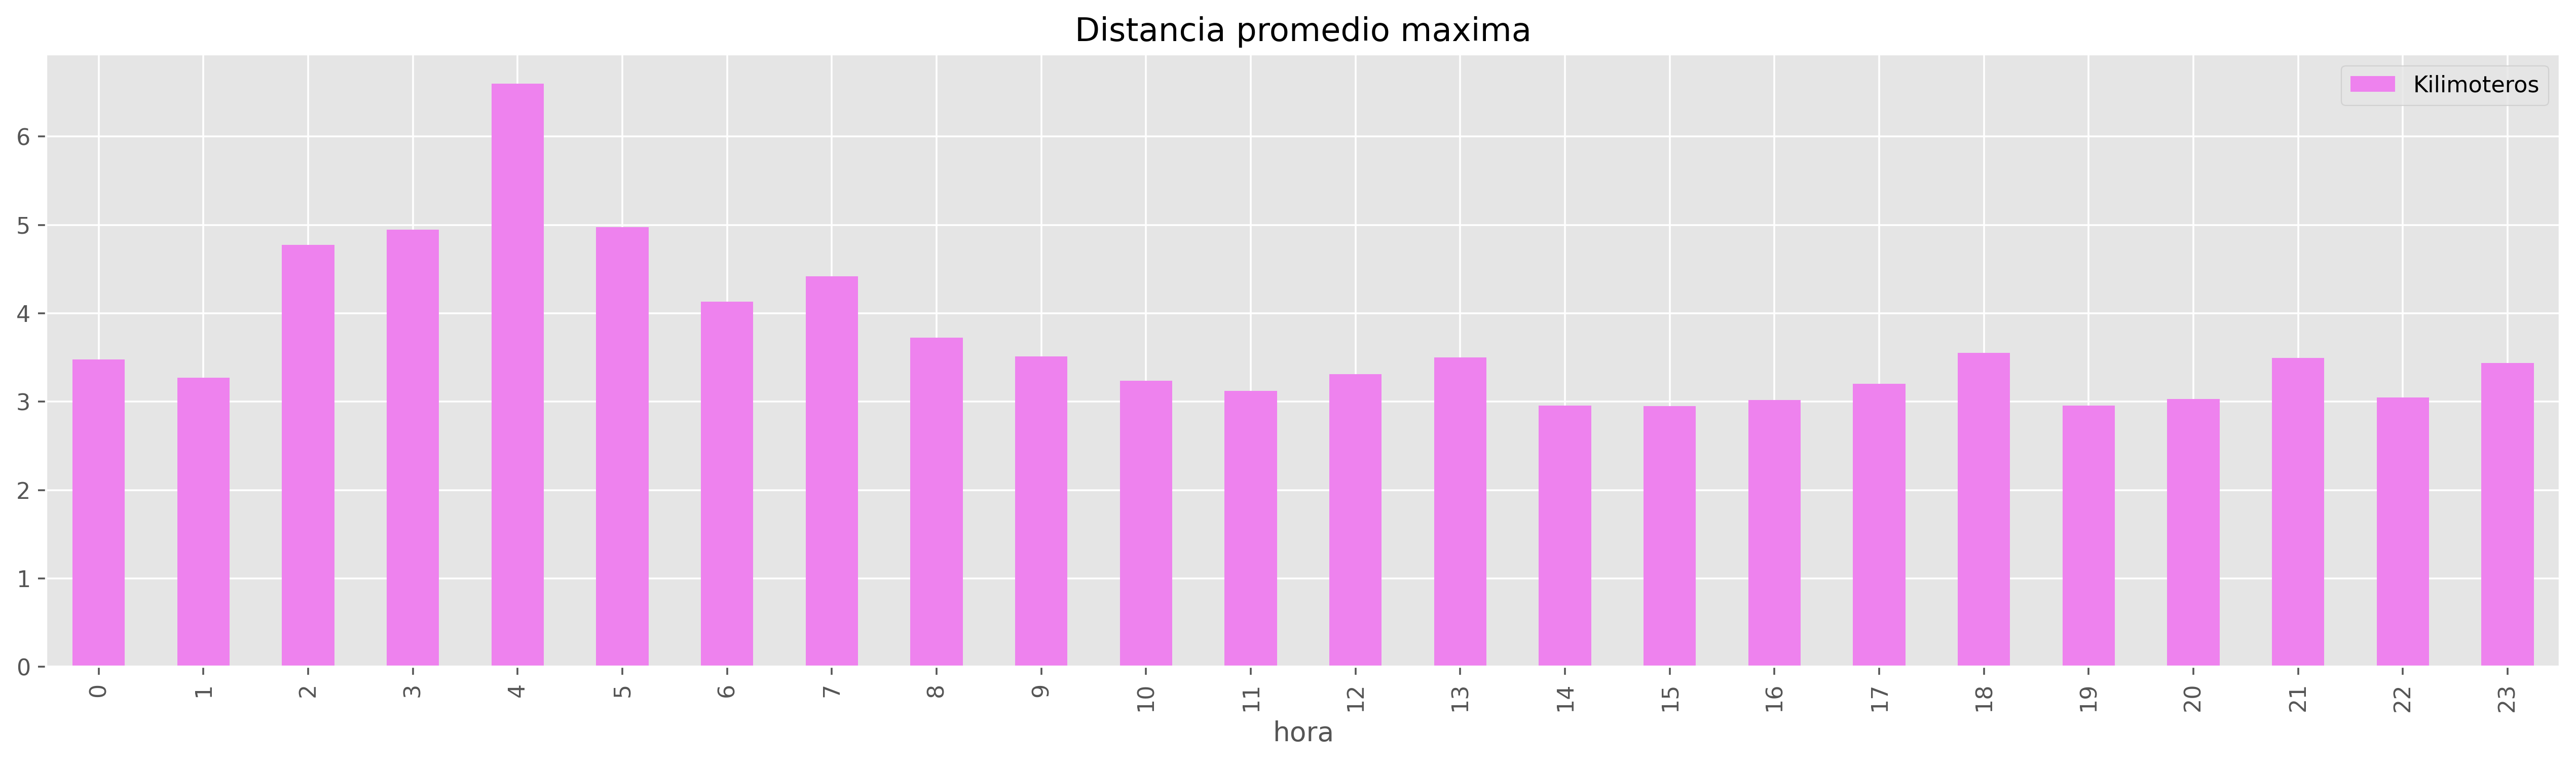

In [106]:
horario['distancia'].max().plot(
    kind = 'bar',
    label = 'Kilimoteros',
    color={ 'violet' }
)
pyplot.legend( loc = 'best' )
pyplot.title( 'Distancia promedio maxima' )
pyplot.show()

In [ ]:
# ESTACIONES
# datasets['estaciones']['df']

In [211]:
# demanda_diaria.mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
estaciones = datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id', 'fecha' ]
).agg(
  salidas = ( 'origen_id',  'count'),
  arribos = ( 'destino_id',  'count'),
  estaciones = ( 'origen_nombre',  'first'),
#   duracion = ( 'duracion_mins',  'mean'),
)
# .sort_values( 'origen_nombre', ascending = True ).head(20)

estaciones = estaciones.pivot_table(
    index = [ 'fecha'],
    columns = ['estaciones'],
    values = ['salidas', 'arribos'],
    # aggfunc ='sum',
    fill_value = 0,
)

In [ ]:
# estaciones['salidas'].info()
# demanda_estaciones['salidas'].plot()
estaciones['salidas'].rolling( window = 3 ).mean().rolling( window = 3 ).mean()


In [237]:
print( estaciones['salidas'].mean().sort_values( ascending = False ).head( 10) )

estaciones
GODOY CRUZ Y LIBERTADOR       101.965885
PACIFICO                      101.443497
PARQUE CENTENARIO              98.989339
PLAZA BOLIVIA                  92.823028
BARRANCAS DE BELGRANO          86.599147
CONSTITUCIÓN                   73.699360
GENERAL URQUIZA                73.027719
FACULTAD DE DERECHO            70.275053
PLAZA ITALIA                   69.264392
PLAZA REPÚBLICA DE ECUADOR     67.053305
dtype: float64


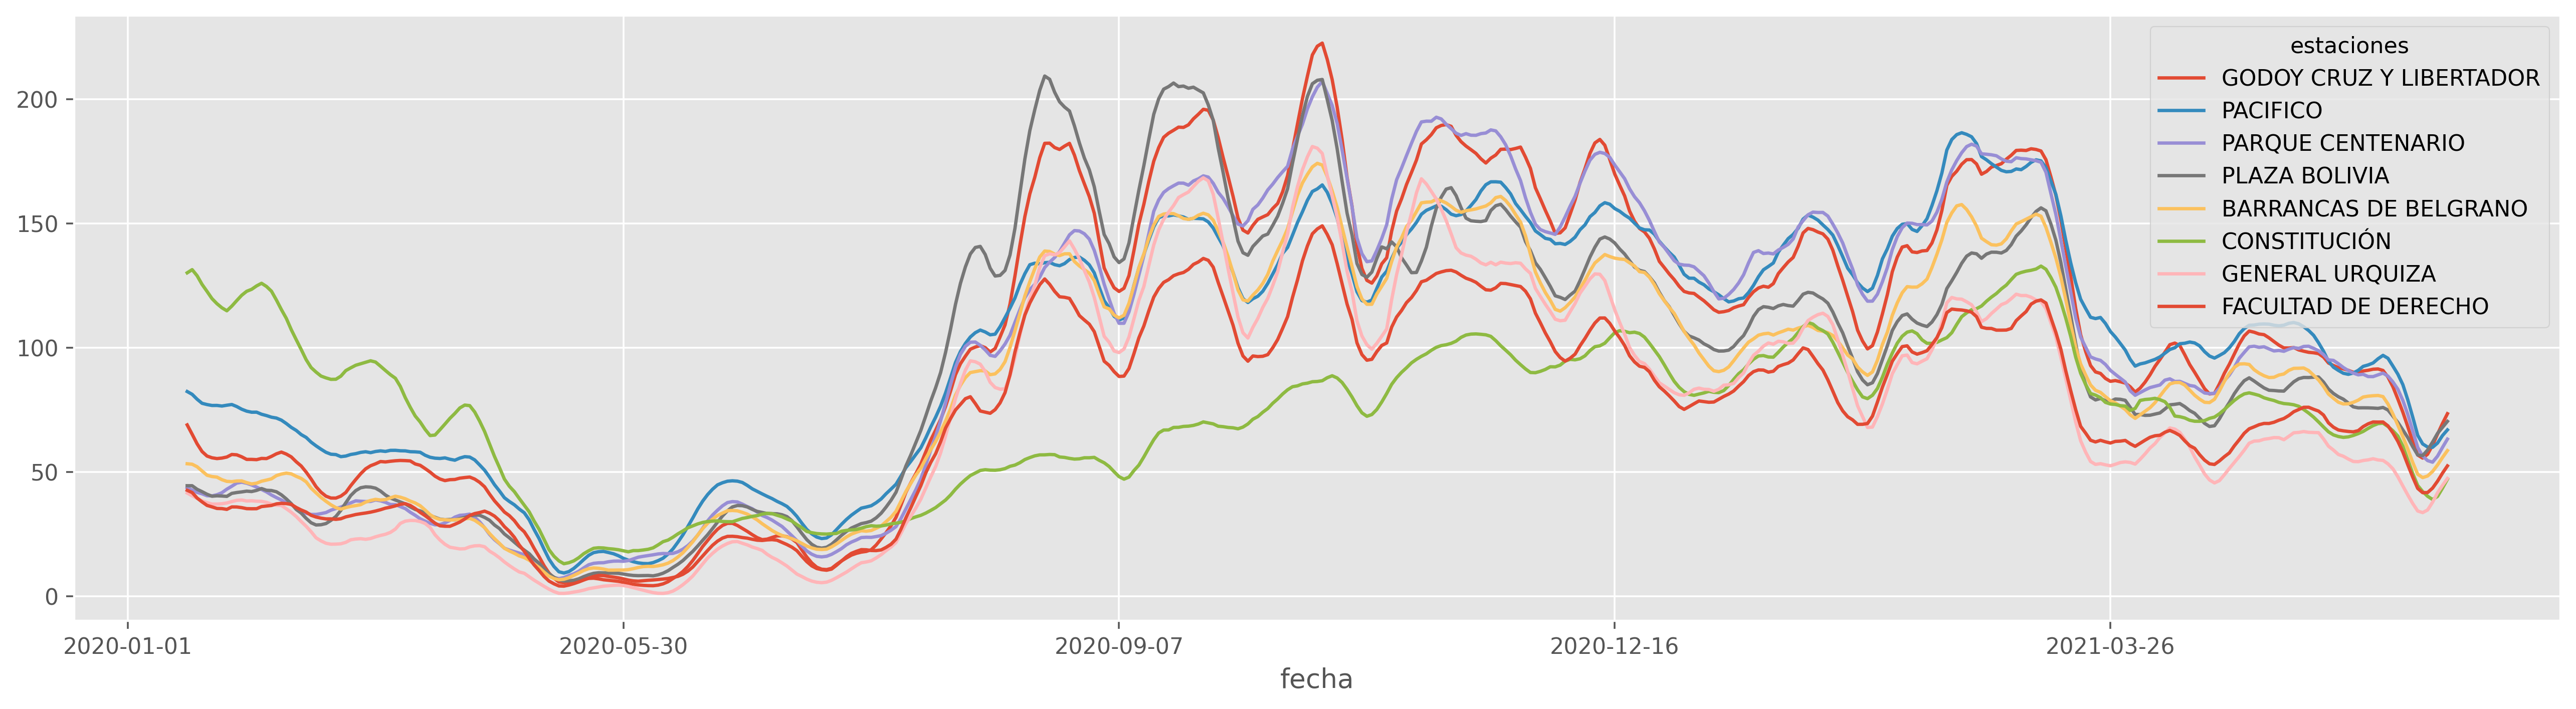

In [274]:
# https://sharkcoder.com/data-visualization/mpl-stacked-bars
top = estaciones['salidas'].mean().sort_values( ascending = False )[ 
#     estaciones['salidas'].mean() >= estaciones['salidas'].mean().mean()
    estaciones['salidas'].mean() > 70
]
df = estaciones['salidas'][top.keys()].rolling( 7 ).mean().rolling( 7 ).mean()
# .sort_values( by = , ascending=False).head(10)
# df = sector_data.T
df.plot( kind='line',  y = df.columns.tolist() )
pyplot.show()

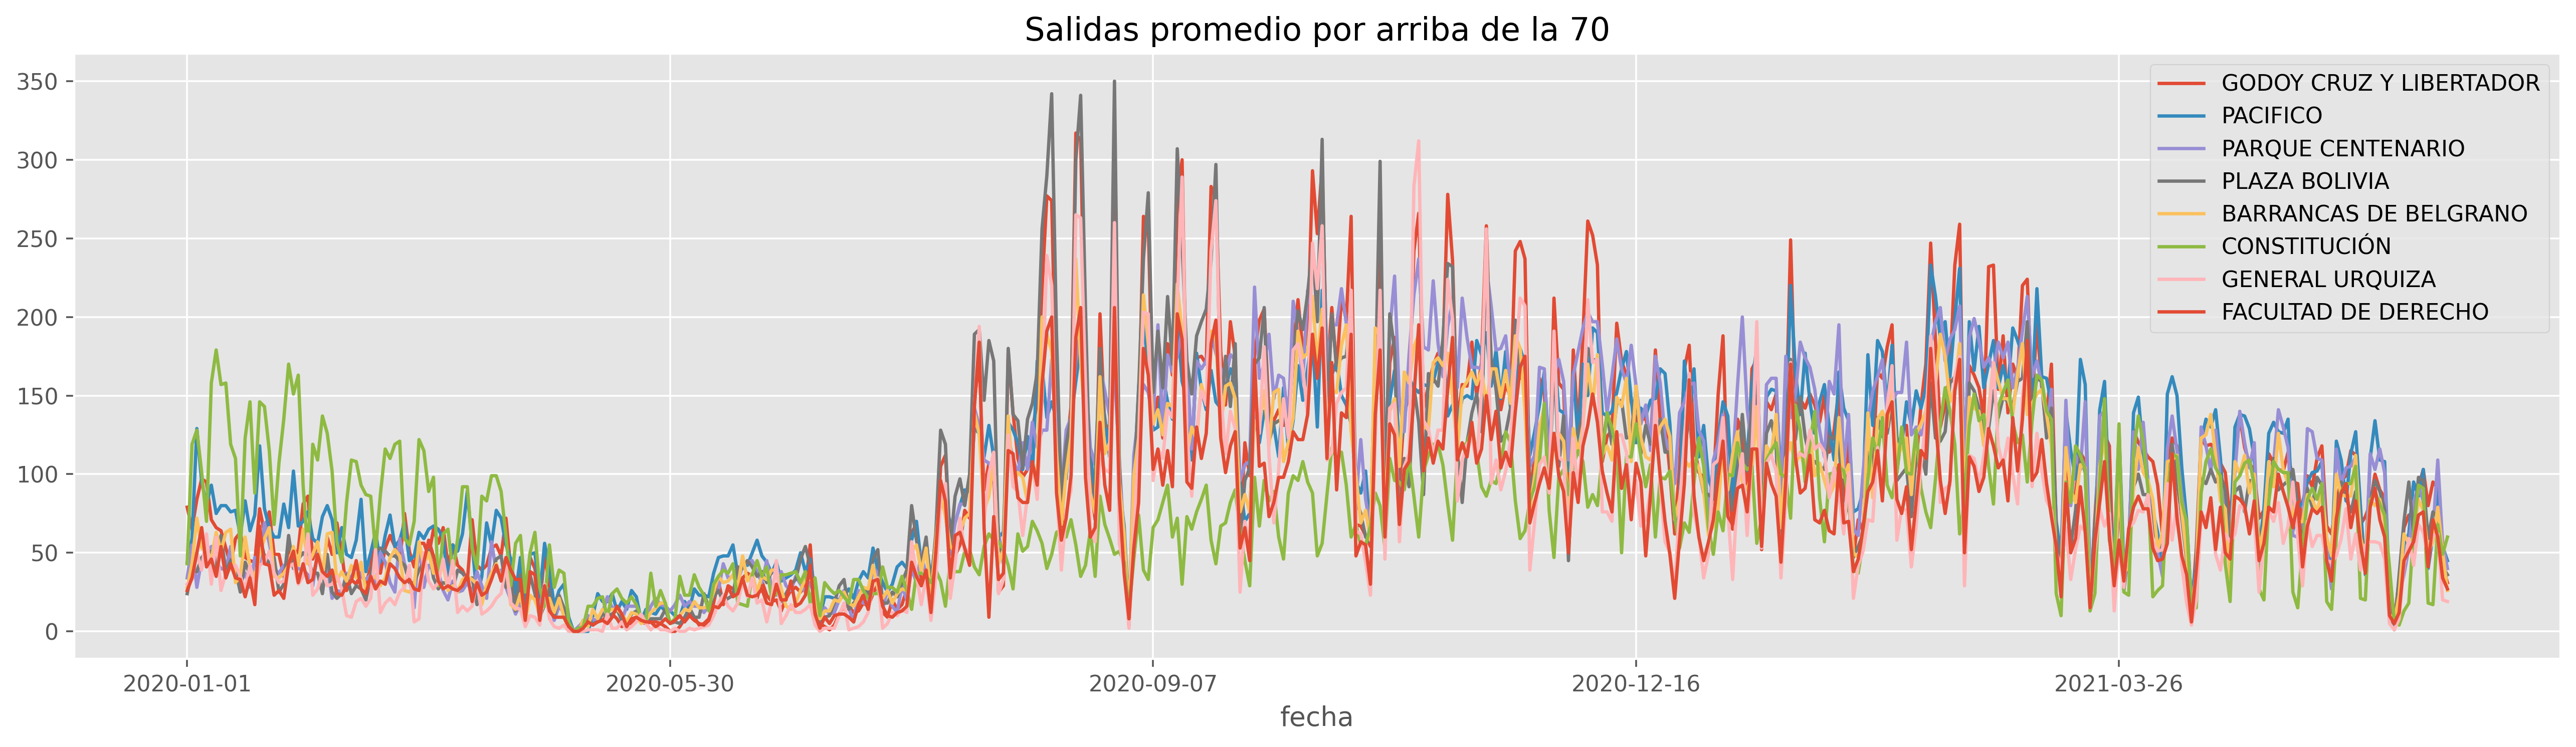

In [215]:
top = estaciones['salidas'].mean().sort_values( ascending = False )[ 
#     estaciones['salidas'].mean() >= estaciones['salidas'].mean().mean()
    estaciones['salidas'].mean() > 70
]
estaciones['salidas'][ top.keys() ].plot( )
pyplot.legend( loc = 'best' )
pyplot.title( 'Salidas promedio por arriba de la 70' )
pyplot.show()
# estaciones.info()

In [ ]:
# # pyplot.plot( demanda_diaria['duracion'].rolling(21).mean(),label= 'MA 21 days')
# pyplot.legend( loc = 'best' )
# pyplot.title( 'Duracion AVG  delta' )
# pyplot.show()

# diaria['salidas'].mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
# pyplot.legend( loc = 'best' )
# pyplot.title( 'Dias de menos demamda' )
# pyplot.show()

top = estaciones['salidas'].rolling(window=3).mean()[ 
#     estaciones['salidas'].mean() >= estaciones['salidas'].mean().mean()
    estaciones['salidas'].rolling(window=3).mean() > 1000
]
estaciones['salidas'][ top.keys() ].plot( )
pyplot.legend( loc = 'best' )
pyplot.title( 'Salidas promedio por arriba de la 70' )
pyplot.show()
# estaciones.info()

In [ ]:
estaciones['salidas'].mean().sort_values( ascending = False ).head(20).plot( kind='bar', label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( '20 estaciones de mayor demanda diaria maxima' )
pyplot.show()

In [ ]:
estaciones['salidas'].mean().sort_values( ascending = False ).tail(20).plot( kind='bar',label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( '20 estaciones de menor demanda maxima' )
pyplot.show()

In [ ]:
# # https://sharkcoder.com/data-visualization/mpl-bidirectional
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import pandas as pd
# import seaborn as sns
# sns.set()
# %matplotlib notebook
# font_color = '#525252'
# hfont = {'fontname':'Calibri'}
# facecolor = '#eaeaf2'
# color_red = '#fd625e'
# color_blue = '#01b8aa'
# index = data.index
# column0 = data['Expenditures']
# column1 = data['Revenues']
# title0 = 'Expenditures, USD thousand'
# title1 = 'Revenues, USD thousand'    
#     fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
# fig.tight_layout()



# axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
# axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
# axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
# axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
#     # If you have positive numbers and want to invert the x-axis of the left plot
# axes[0].invert_xaxis() 

# # To show data from highest to lowest
# plt.gca().invert_yaxis()
#     axes[0].set(yticks=data.index, yticklabels=data.index)
# axes[0].yaxis.tick_left()
# axes[0].tick_params(axis='y', colors='white') # tick color
#     axes[1].set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])

# plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
            
# filename = 'mpl-bidirectional'
# plt.savefig(filename+'.png', facecolor=facecolor)

In [ ]:
# # MEDIA MOVIL
# # import pandas_datareader.data as web
# # import matplotlib.pyplot as plt
# # import datetime
# # figure( figsize=(20, 5), dpi=320 )

# # pyplot.plot( demanda_diaria['duracion'].mean(), label= 'Duracion AVG' )
# demanda_diaria['duracion'].mean().plot( label = 'Duracion AVG' )

# # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
# # pyplot.plot( demanda_diaria['duracion'].rolling(9).mean(), label= 'MA 9 days')
# # pyplot.plot( demanda_diaria['duracion'].rolling(21).mean(),label= 'MA 21 days')
# pyplot.legend( loc = 'best' )
# pyplot.title( 'Duracion AVG  delta' )
# pyplot.show()

diaria['salidas'].mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( 'Dias de menos demamda' )
pyplot.show()


In [ ]:
# demanda_estaciones['salidas'].plot()
# # pyplot.legend( loc = 'best' )
# pyplot.title( 'Demanda diaria por estacion' )
# pyplot.show()

In [ ]:
# # print(demanda_diaria['salidas'])
# for dia in demanda_diaria['salidas'].columns.to_list():
# #     demandas = demanda_diaria['salidas'][h]
#     estaciones = demanda_diaria['salidas'][dia].reset_index()
#     for e in estaciones.iterrows():
#         estacion = e[1]
#         estacion_origen =  estacion['origen_id']
#         estacion_salidas =  estacion[h]
#         print(h, estacion_origen, estacion_salidas)

### Gruping

### GRUPING & RESHAIPING
#### DEMANDA DIARIA

In [23]:
# GRUPING USERS
usurios = datasets['recorridos']['df'].groupby(
    ['usuario_id']
).agg(
  salidas = ( 'destino_id',  'count'),
  vueltas = ( 'vuelta',  'sum'),
  velocidad = ( 'velocidad_kmm',  'mean'),
  distancia = ( 'distancia',  'mean')
)
# usurios = usurios.pivot_table(
#     index   = [ 'usuario_id'],
#     columns = 'salidas',
#     values  = 'salidas',
#     # aggfunc = 'count',
# ).sort_values('origen_id')
# demanda_diaria # comprobar

In [20]:
usurios = usurios[ ~usurios.isin( [np.nan, np.inf, -np.inf]).any(1) ]
# usurios
usurios.sort_values( 'salidas' , ascending = False).head(30)

salidas  vueltas  velocidad  distancia
usuario_id                                        
4240            947       29   0.330000       7.09
12434           911      166   0.400000       9.47
35506           795        9   0.280000       3.87
14239           775       11   0.358800       9.16
668737          748        2   0.285000       3.89
16145           715        7   0.358333       7.24
174799          713        9   0.280000       4.19
101843          699       63   0.370000       5.69
167637          698       19   0.270000       5.31
101697          695       66   0.320000       6.00
201181          672       11   0.260000       5.61
268778          667        8   0.286667       7.29
569922          654       17   0.356667       5.96
19586           648        2   0.510000       6.95
493435          641        9   0.246667       6.33
693695          620       60   0.274444       8.10
666883          613        4   0.315000       5.95
59203           611        5   0.302000       5.60
51346           609       56   0.244286      11.55
37092           606       21   0.286250       5.70
494281          588       61   0.330000       5.84
167613          585       95   0.270000       5.66
20565           575        5   0.285000       5.52
581238          573        7   0.316842      12.04
664902          566        3   0.289167       5.31
362733          563       28   0.264000       8.45
279685          557        9   0.256667       9.47
666289          554        3   0.378750       6.76
191455          552       61   0.418571       7.50
726982          549       67   0.235000       7.43

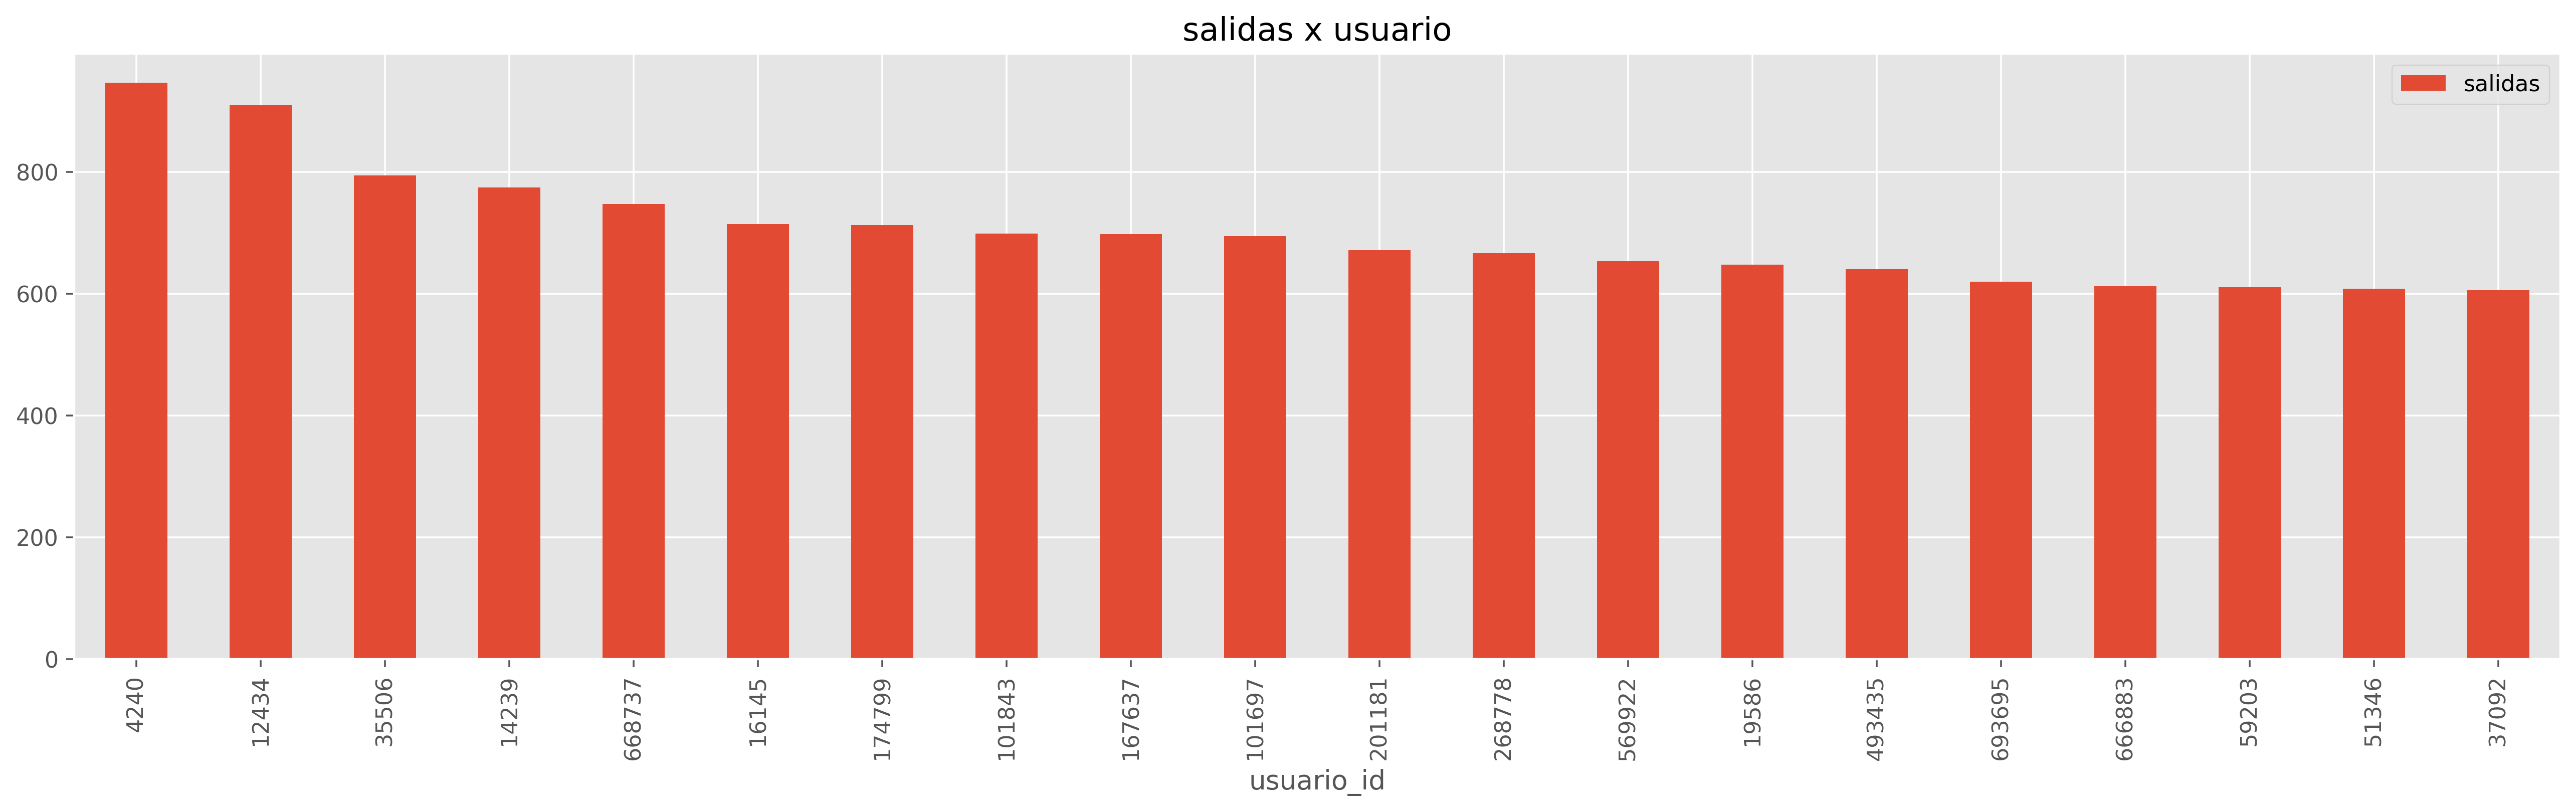

In [25]:
usurios['salidas'].sort_values( ascending = False ).head(20).plot( kind = 'bar',label = 'salidas')
pyplot.legend( loc = 'best' )
pyplot.title( 'salidas x usuario' )
pyplot.show()

# Analisis Exploratorio de Datos Espaciales



## Exploratory Spatial Data Analysis (ESDA)

https://alcidanalytics.com/p/geographic-heatmap-in-python

https://alysivji.github.io/getting-started-with-folium.html

https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

In [ ]:
# demanda_viz = derivados['recorridos']['df']
# # Fitro x dia

# demanda_viz = demanda_viz[ demanda_viz['fecha'] == '2020-01-01' ]
# demanda_viz

In [ ]:
demanda_viz = derivados['recorridos']['df']
# Fitro x dia
fecha_viz   = '2020-03-01'
demanda_viz = demanda_viz[ demanda_viz['fecha'] == fecha_viz ]
demanda_viz = demanda_viz.groupby(
    ['origen_nombre', 'origen_id', 'hora', 'origen_lon','origen_lat']
).agg(
  salidas = ( 'hora',  'count' ),
  nombre  = ( 'origen_nombre',  'first' ),
  id      = ( 'origen_id',  'first' ),
  lon     = ( 'origen_lon',  'first' ),
  lat     = ( 'origen_lat',  'first' ),
)
# ).reset_index()
# df.set_index(['id', 'date', 'location'], append=True)
demanda_viz = demanda_viz.pivot_table(
    index = ['nombre',  'id', 'lon','lat'],
    columns = 'hora',
    values = 'salidas',
    fill_value = 0,
    # aggfunc = 'sum',
).sort_values('id')

In [ ]:
# import folium
# from folium import plugins
# # import pandas as pd
# # import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline

In [ ]:
#... where m is my map object. And 5 is the time (seconds) to render the map.
# https://stackoverflow.com/questions/53565979/export-a-folium-map-as-a-png
# https://blog.ouseful.info/2015/12/15/grabbing-screenshots-of-folium-produced-choropleth-leaflet-maps-using-selenium/
# from time import sleep
import io
from PIL import Image

# !pip install folium selenium
import folium 
from folium.features import DivIcon
import selenium

import math
def mapear(x): 
    return int( (x / 10 ) * 255)



In [ ]:
# del m
m = ''
for h in demanda_viz.columns.to_list():
    del m
    m = folium.Map(
#         [ -34.606499,-58.381094 ], # obelisco
        [-34.606739, -58.435539 ], # parque centenario
        zoom_start = 13,
        zoom_control=False,
        scrollWheelZoom=False,
        dragging=False
#         tiles='stamentoner'
    )
    folium.map.Marker(
        [ -34.559920, -58.372211 ],
        icon = DivIcon(
            icon_size=(600,400),
            icon_anchor=(0,0),
            html='<div style='font-size: 20pt;font-family: monospace;'>' \
            + fecha_viz + ' HORA:' + '{:02d}'.format( h ) \
            + '</div>',
        )
    ).add_to(m)
    demandas = demanda_viz[h]
    estaciones = demanda_viz[h].reset_index()
    for e in estaciones.iterrows():
        estacion = e[1]
        folium.CircleMarker(
            [ estacion['lat'], estacion['lon'] ],
            radius = estacion[h] * 5, 
            popup = '{0}\:{1}\demanda:{2}'.format(
                estacion['id'],
                estacion['nombre'],
                str(estacion[h]),
            ),
            fill_color = '#{0:02x}{1:02x}{2:02x}'.format(
                mapear( int(estacion[h]) ),
                255 - mapear( int(estacion[h]) ) ,
                255 - mapear( int(estacion[h]) )
            )
        ).add_to(m)
#     m.save( 'ESDA/' + fecha_viz + '_' + '{:02d}'.format( h ) + '_' + 'map.html')
    
    img_data = m._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    img.save( 'ESDA/' + fecha_viz + '_' + '{:02d}'.format( h ) + '_' + 'map.png' )

In [ ]:
# !convert -density 72 'ESDA/2020-03-01_00_map.html' '2020-03-01_00_map.html'


In [ ]:
# !ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -acodec aac ESDA.mp4
!ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -an ESDA.mp4

In [ ]:
# Import the library
from chord import Chord


# Basic cord diagram
# TODO THIS WON'T WORK BECAUSE INPUT TYPE ISNT RECOGNIZE
# Chord(data, names).to_html('../../static/interactiveCharts/chord-diagram-chord-library.html')
matrix = [
    [0, 5, 6, 4, 7, 4],
    [5, 0, 5, 4, 6, 5],
    [6, 5, 0, 4, 5, 5],
    [4, 4, 4, 0, 5, 5],
    [7, 6, 5, 5, 0, 4],
    [4, 5, 5, 5, 4, 0],
]


names = ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Thriller']

matrix
[[0, 5, 6, 4, 7, 4],
 [5, 0, 5, 4, 6, 5],
 [6, 5, 0, 4, 5, 5],
 [4, 4, 4, 0, 5, 5],
 [7, 6, 5, 5, 0, 4],
 [4, 5, 5, 5, 4, 0]]

Chord(matrix, names).to_html('../../static/interactiveCharts/chord-diagram-chord-library.html')
%%html
<iframe src='../../interactiveCharts/chord-diagram-chord-library.html'
    width='800'
    height='600'
    title='Chord diagram with the chord library'
    style='border:none'
></iframe>

## reserva

In [ ]:
# # !pip install ffmpeg-python
# import ffmpeg
# # stream = ffmpeg.input('input.mp4')
# # stream = ffmpeg.hflip(stream)
# # stream = ffmpeg.output(stream, 'output.mp4')
# # ffmpeg.run(stream)
# del stream
# stream = ffmpeg.input( 'ESDA/*.png', pattern_type = 'glob', framerate = 24 )
# stream = ffmpeg.output( stream, 'ESDA.mp4')
# ffmpeg.run(stream)


In [ ]:
# import math
# def mapear(x): 
#   return int( (x / 30295 ) * 255) 
# m = folium.Map(
#   [ -34.606499,-58.381094 ],
#   zoom_start = 14
# )
# #  mark each station as a point
# for e in derivados['estaciones']['df'].iterrows():
#   folium.CircleMarker(
#       [ estacion['lat'], estacion['lon'] ],
#       radius= estacion['salidas'] * 0.002, 
#       popup = '{0}\nsalidas:{1}\narribos:{2}'.format(
#           estacion['nombre'],
#           str(estacion['salidas']),
#           str(estacion['arribos'])
#       ),
#       fill_color = '#{0:02x}{1:02x}{2:02x}'.format(
#           mapear( int(estacion['salidas']) ),
#           255 - mapear( int(estacion['salidas']) ) ,
#           255 - mapear( int(estacion['salidas']) )
#       )
#   ).add_to(m)
# m

In [ ]:
# # convert to (n, 2) nd-array format for heatmap
# # stationArr = derivados['estaciones']['df'][['lat', 'lon']].as_matrix()
# # https://stackoverflow.com/a/63293803
# stationArr = derivados['estaciones']['df'][['salidas']].values

# # plot heatmap
# m.add_children(plugins.HeatMap(stationArr, radius=15))
# m

In [ ]:
'''
We will create a helper function with default keyword arguments to abstact away
Folium's complexity. This leaves us with a simple API we can use going forward.
https://alysivji.github.io/getting-started-with-folium.html
'''
def map_points(
    df,
    lat_col = 'lat',
    lon_col = 'lon',
    zoom_start = 11, 
    plot_points = False,
    pt_radius = 15, 
    draw_heatmap = False,
    heat_map_weights_col = None, 
    heat_map_weights_normalize = False,
    heat_map_radius = 15,
    popup_name = 'nombre'
):
  '''
  Creates a map given a dataframe of points. 
  Can also produce a heatmap overlay

  Arg:
    df: dataframe containing points to maps
    lat_col: Column containing latitude (string)
    lon_col: Column containing lonitude (string)
    zoom_start: Integer representing the initial zoom of the map
    plot_points: Add points to map (boolean)
    pt_radius: Size of each point
    draw_heatmap: Add heatmap to map (boolean)
    heat_map_weights_col: Column containing heatmap weights
    heat_map_weights_normalize: Normalize heatmap weights (boolean)
    heat_map_radius: Size of heatmap point
    popup_name: name of the popup

  Returns:
      folium map object
  '''

  ## center map in the middle of points center in
  middle_lat = df[lat_col].median()
  middle_lon = df[lon_col].median()

  curr_map = folium.Map(
      location=[middle_lat, middle_lon],
      zoom_start=zoom_start
  )
  cols_to_pull = [ lat_col, lon_col, heat_map_weights_col ]
  # add points to map
  if plot_points:
    for _, row in df.iterrows():
      folium.CircleMarker(
        [ row[lat_col], row[lon_col] ],
        radius = pt_radius,
        popup = row[ popup_name ],
        fill_color = '#3db7e4', # divvy color
      ).add_to( curr_map )
  

  # add heatmap
  if draw_heatmap:
    # convert to (n, 2) or (n, 3) matrix format
    if heat_map_weights_col is None:
      cols_to_pull = [lat_col, lon_col]
    else:
      # if we have to normalize
      if heat_map_weights_normalize:
        df[ heat_map_weights_col] = df[heat_map_weights_col] / df[heat_map_weights_col].sum()
        cols_to_pull = [ lat_col, lon_col, heat_map_weights_col ]
      stations = df[cols_to_pull].values
      curr_map.add_children(
          plugins.HeatMap(
              stations,
              radius = heat_map_radius
          )
      )
  return curr_map

In [ ]:
# del m
m = map_points(
    derivados['estaciones']['df'],
    plot_points = False,
    draw_heatmap = True,
    heat_map_weights_col = 'salidas',
    heat_map_weights_normalize = True,
)
m

In [ ]:
derivados['recorridos']['df'].info()

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/drive')

In [ ]:
# Fetch weather from drive
id = '14BpBfjQ3IrfeK8CajCWrEdfPg7S0eqc8'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('weather-data-ba.csv') 
weather_data_df = pd.read_csv('weather-data-ba.csv')
weather_data_df.head()
weather_data_df = weather_data_df.filter(
    ['DATE','PRCP','TAVG']
)
weather_data_df.isnull().sum( axis = 0 )
weather_data_df['PRCP'] = weather_data_df['PRCP'].replace( np.nan, 0 )
weather_data_df.head()

In [ ]:
bicicletas['recorridos_clima_df'].to_csv(
    '/drive/My Drive/Datasets-bicing/recorridos-clima-2020-2021.csv'
)

In [ ]:
bicicletas['recorridos_clima_df'].head()

## Bajar el ultimo
Bajar el dataset limpio desde drive

In [ ]:
from google.colab import files
files.download('recorridos_2020-2021.zip')

In [ ]:
bicicletas['recorridos_df'].to_csv(
    '/drive/My Drive/Datasets-bicing/recorridos_2020-2021.csv'
)

In [ ]:
id = '17liAPD1lyj2wT-Hcbh4ed9-Cn4peoyIq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('recorridos_2020-2021.csv') 
bicicletas['recorridos_df'] = pd.read_csv('recorridos_2020-2021.csv')
bicicletas['recorridos_df'].head()